# Get Test Trader Data

In [1]:
from Data_Operation import Preparation

In [2]:
data_set = Preparation(folder_path='Test_trader_data')
data_set.Get

,Time,Type,Volume,Symbol,Price,S/L,T/P,Time,Price,Commission,Swap,Profit,Comment
0,2021-02-01 00:32:36,Balance,0.00,0,0.00000,0,0.00000,0,0.00000,0.00,0.0,10000.00,Deposit
1,2021-02-01 00:35:18,Balance,0.00,0,0.00000,0,0.00000,0,0.00000,0.00,0.0,14000.00,Deposit
2,2021-02-01 02:40:01,Sell,0.07,EURUSD,1.21305,0,1.21196,2021-02-01 09:03:27,1.21194,-0.56,0.0,7.77,[tp]
3,2021-02-01 09:05:02,Sell,0.07,EURUSD,1.21239,0,1.21131,2021-02-01 09:29:44,1.21131,-0.56,0.0,7.56,[tp]
4,2021-02-01 09:30:02,Sell,0.07,EURUSD,1.21137,0,1.21029,2021-02-01 09:50:39,1.21026,-0.56,0.0,7.77,[tp]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,2022-04-08 10:15:02,Buy,0.06,EURUSD,1.08751,0,1.08723,2022-04-08 11:04:46,1.08726,-0.48,0.0,-1.50,[tp]
6685,2022-04-08 10:35:02,Buy,0.12,EURUSD,1.08647,0,1.08723,2022-04-08 11:04:46,1.08726,-0.96,0.0,9.48,[tp]
6686,2022-04-08 09:45:01,Buy,0.06,AUDNZD,1.08797,0,1.08855,2022-04-08 11:43:14,1.08856,-0.48,0.0,2.46,[tp]
6687,2022-04-08 11:05:02,Buy,0.06,EURUSD,1.08732,0,1.08840,2022-04-08 12:09:33,1.08662,-0.48,0.0,-4.20,0


# Get Market Data 

In [3]:
from Data_Operation import Market_Data , OpenClose_data

In [4]:
ETHUSD = Market_Data(
    Symbol='ETHUSD',
    Start_Date= "2022-01-01T00:00:00.000",
    End_Data="2022-02-01T00:00:00.000",
    Interval="1H"
).send_post_request

In [5]:
ETHUSD

,time,open,high,low,close,volume
0,2022-01-03 05:42:00,3820.48,3823.2,3818.70,3823.20,13.5813
1,2022-01-03 05:43:00,3822.70,3822.7,3819.80,3819.90,22.3056
2,2022-01-03 05:44:00,3819.80,3819.8,3816.90,3816.90,10.0883
3,2022-01-03 05:45:00,3817.10,3819.3,3817.10,3819.30,3.9636
4,2022-01-03 05:46:00,3819.30,3819.3,3818.60,3818.60,23.0657
...,...,...,...,...,...,...
43663,2022-01-19 12:15:00,3120.00,3122.0,3119.07,3119.07,15.0836
43664,2022-01-19 12:16:00,3118.20,3120.4,3118.10,3120.40,1.2899
43665,2022-01-19 12:17:00,3119.90,3120.2,3119.90,3120.20,0.6593
43666,2022-01-19 12:18:00,3121.30,3121.3,3120.40,3120.40,0.4631


In [6]:
open_close = OpenClose_data(
    Symbol='ETHUSD',
    Start_Date= "2022-01-01T00:00:00.000",
    End_Data="2022-02-01T00:00:00.000",
).send_post_request

In [7]:
open_close

,candlewindow,utctime,close
0,-50% (start),2021-12-16 13:23:00,4041.80
1,-40% (start),2021-12-19 14:37:00,3951.50
2,-30% (start),2021-12-22 15:48:00,4002.72
3,-20% (start),2021-12-25 18:56:00,4084.00
4,-10% (start),2021-12-28 22:10:00,3814.60
5,(start),2022-01-01 00:00:00,3685.00
6,+10% (start),2022-01-04 06:53:00,3751.31
7,+20% (start),2022-01-07 09:49:00,3255.20
8,+30% (start),2022-01-10 11:08:00,3115.70
9,+40% (start),2022-01-13 13:56:00,3368.60


# Duration

In [6]:
from Evaluation_Attributes import Duration

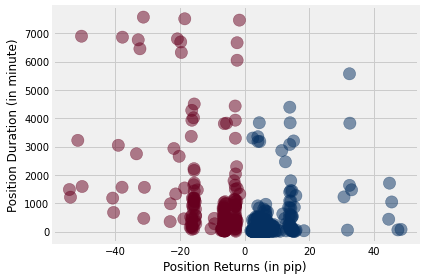

In [7]:
data = data_set.Get
Duration(data).plot

In [8]:
Duration(data).Duration_data

,Position Duration (in minute),Position Returns (in pip)
0,41.12,4.337330
1,135.00,4.594043
2,98.28,-15.770021
3,86.87,-2.953095
4,62.83,13.921646
...,...,...
930,1.87,15.230895
931,138.38,4.504587
932,3.45,4.509853
933,111.38,4.418954


# Open/Close Strategy

In [2]:
from Data_Operation import Preparation
from Evaluation_Attributes.Open_Close_Strategy import OS_CS


In [3]:
data_set = Preparation(folder_path='Test_trader_data')


In [5]:
df = data_set.Get
df.shape


(793, 10)

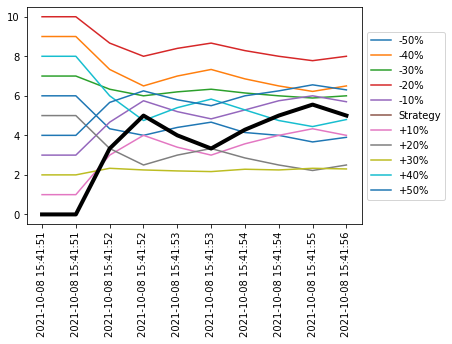

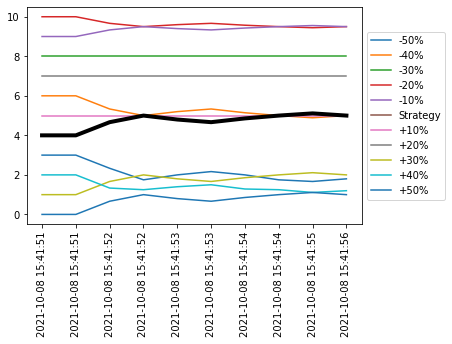

In [14]:
os_cs= OS_CS(df.loc[:10])

In [15]:
os_cs._open_score, os_cs._close_score


(5.0, 5.0)

# Detailed Open/Close Strategy Codes

In [1]:
import pandas as pd
from Data_Operation import OpenClose_data
import matplotlib.pyplot as plt


In [10]:
#Preprocess
df = df.drop(
    index=df[df.Type == "Balance"].index).reset_index(drop=True)

# Renaming Time & Price columns
df = pd.concat([df.iloc[:, :5].rename(columns={'Time': 'Time1', 'Price': 'Price1'}),
                               df.iloc[:, 5:].rename(columns={'Time': 'Time2', 'Price': 'Price2'})], axis=1)

# Correction of Time2 datatype
df.Time2 = pd.to_datetime(df.Time2)

# Sort by Time2
df= df.sort_values(by='Time2')

In [14]:
prices = df.loc[:10].apply(lambda x: OpenClose_data(
    Symbol=x.Symbol,
    Start_Date=x.Time1.strftime("%Y-%m-%dT%H:%M:00.000"),
    End_Data=x.Time2.strftime("%Y-%m-%dT%H:%M:00.000"),
).send_post_request,axis=1).to_frame()

In [11]:
df

,Time1,Type,Volume,Symbol,Price1,S/L,T/P,Time2,Price2,Commission,Swap,Profit,Comment
0,2018-06-04 15:15:03,Sell,0.01,AUDCAD,0.98926,0,0.98630,2018-06-06 15:00:22,0.98744,-0.08,-0.02,1.41,0
1,2018-06-05 17:15:00,Sell,0.01,AUDCAD,0.99145,0,0.98506,2018-06-06 15:15:00,0.98632,-0.08,-0.01,3.91,0
2,2018-06-05 17:00:05,Sell,0.01,AUDCAD,0.99051,0,0.98783,2018-06-07 23:58:12,0.98783,-0.08,-0.05,2.09,[tp]
3,2018-06-06 20:15:03,Sell,0.01,AUDCAD,0.99184,0,0.98459,2018-06-08 11:30:35,0.98630,-0.08,-0.05,4.26,0
4,2018-06-11 16:45:10,Sell,0.01,NZDCAD,0.91699,0,0.91256,2018-06-11 20:00:51,0.91310,-0.07,0.00,2.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,2022-04-05 10:30:00,Sell,0.28,AUDCAD,0.95102,0,0.94298,2022-04-06 17:44:28,0.94297,-1.07,-0.53,180.41,0
4294,2022-04-05 10:30:00,Sell,0.28,AUDCAD,0.95101,0,0.94184,2022-04-06 17:45:05,0.94304,-1.07,-0.53,178.60,0
4295,2022-04-05 11:45:00,Buy,0.10,EURCAD,1.36631,0,1.36695,2022-04-06 21:24:49,1.36696,-0.55,-0.58,5.18,0
4296,2022-04-04 17:45:04,Buy,0.10,EURGBP,0.83688,0,0.83560,2022-04-07 16:11:18,0.83560,-0.55,-2.45,-16.73,0


# Problem 1:

Showing how different are statement prices and fetched prices for the same times

Time1

In [71]:
pd.concat([df.Time1[:11], df.Symbol[:11], df.Price1[:11],  prices[0].apply(lambda x: x.loc[5].close)], axis=1)


,Time1,Symbol,Price1,0
0,2018-06-04 15:15:03,AUDCAD,0.98926,0.98819
1,2018-06-05 17:15:00,AUDCAD,0.99145,0.98956
2,2018-06-05 17:00:05,AUDCAD,0.99051,0.98962
3,2018-06-06 20:15:03,AUDCAD,0.99184,0.99326
4,2018-06-11 16:45:10,NZDCAD,0.91699,0.91350
5,2018-06-14 07:15:04,AUDNZD,1.07616,1.07404
6,2018-06-14 08:45:06,AUDNZD,1.07302,1.07457
7,2018-06-14 08:15:10,AUDNZD,1.07574,1.07398
8,2018-06-14 22:00:04,AUDNZD,1.07204,1.07227
9,2018-06-14 08:30:01,AUDNZD,1.07423,1.07423


Time2

In [73]:
pd.concat([df.Time2[:11], df.Symbol[:11], df.Price2[:11],
          prices[0].apply(lambda x: x.loc[16].close)], axis=1)


,Time2,Symbol,Price2,0
0,2018-06-06 15:00:22,AUDCAD,0.98744,0.98947
1,2018-06-06 15:15:00,AUDCAD,0.98632,0.98988
2,2018-06-07 23:58:12,AUDCAD,0.98783,0.98875
3,2018-06-08 11:30:35,AUDCAD,0.98630,0.98531
4,2018-06-11 20:00:51,NZDCAD,0.91310,0.91210
5,2018-06-15 09:00:35,AUDNZD,1.07412,1.07542
6,2018-06-15 09:00:35,AUDNZD,1.07412,1.07542
7,2018-06-15 10:12:36,AUDNZD,1.07521,1.07468
8,2018-06-15 10:12:36,AUDNZD,1.07521,1.07468
9,2018-06-15 10:14:40,AUDNZD,1.07549,1.07464


# Problem 2:

Showing disordered items on row 10 & 11

In [76]:
prices[0][0]

,candlewindow,utctime,close
0,-50% (start),2018-06-01 15:19:00,0.97914
1,-40% (start),2018-06-01 20:06:00,0.98088
2,-30% (start),2018-06-04 00:57:00,0.98124
3,-20% (start),2018-06-04 05:43:00,0.98577
4,-10% (start),2018-06-04 10:29:00,0.98896
5,(start),2018-06-04 15:15:00,0.98819
6,+10% (start),2018-06-04 20:01:00,0.98950
7,+20% (start),2018-06-05 00:51:00,0.98782
8,+30% (start),2018-06-05 05:37:00,0.98677
9,+40% (start),2018-06-05 10:23:00,0.98871


# Problem 3:

Showing unmacthed API response for short-term trades

In [77]:
from datetime import timedelta
# ERROR: trade duration that are short gets an unexpected API response (not 21 rows of output) - so we choose only long trades to test
df2 = df[df.Time2 - df.Time1 < timedelta(minutes=10)].reset_index()[:10]
prices = df2.apply(lambda x: OpenClose_data(
    Symbol=x.Symbol,
    Start_Date=x.Time1.strftime("%Y-%m-%dT%H:%M:00.000"),
    End_Data=x.Time2.strftime("%Y-%m-%dT%H:%M:00.000"),
).send_post_request, axis=1).to_frame()

In [79]:
prices[0][0]

,candlewindow,utctime,close
0,(start),2018-10-05 15:30:00,0.8346
1,(end),2018-10-05 15:30:00,0.8346


In [86]:
prices[0][8]

,candlewindow,utctime,close
0,-40% (start),2019-07-18 04:28:00,1.04287
1,-50% (start),2019-07-18 04:28:00,1.04287
2,-20% (start),2019-07-18 04:29:00,1.04288
3,-30% (start),2019-07-18 04:29:00,1.04288
4,(start),2019-07-18 04:30:00,1.04290
5,+30% (start),2019-07-18 04:31:00,1.04285
6,+20% (start),2019-07-18 04:31:00,1.04285
7,+50% (start),2019-07-18 04:32:00,1.04282
8,+40% (start),2019-07-18 04:32:00,1.04282
9,-40% (end),2019-07-18 04:32:00,1.04282


# Continue the code

In [ ]:
# Preventing error with droping unmatched fetched data
# Selecting only rows with complete data
prices = prices[prices[0].apply(lambda x: len(x)) == 22]
df = df.loc[prices.index]


In [17]:
open_scenarios = prices.apply(lambda x: x[0].loc[16].close / x[0].loc[0:10].close - 1, axis=1)
close_scenarios = prices.apply(lambda x: x[0].loc[11:].close / x[0].loc[5].close - 1, axis=1)

open_scores = 11 - (open_scenarios*-1).rank(axis=1)
close_scores = 11 - (close_scenarios*-1).rank(axis=1)

cumulative_open_score = open_scores.cumsum().div((open_scores.index.values + 1), axis=0)
cumulative_close_score = close_scores.cumsum().div((close_scores.index.values + 1), axis=0)


In [19]:
#Plot
x = df.Time2[:cumulative_open_score.index[-1]+1]


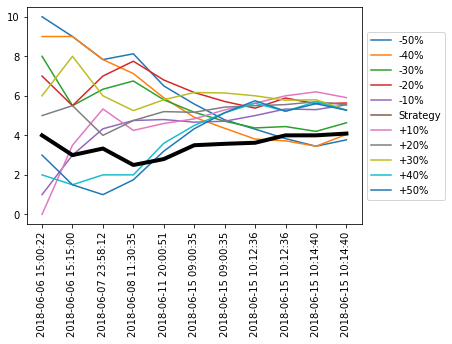

In [32]:
# Plotting: open strategy
plt.figure()
plt.plot(cumulative_open_score)
plt.plot(cumulative_open_score[5], color='black', linewidth=4)
plt.legend(['-50%', '-40%', '-30%', '-20%', '-10%', 'Strategy', '+10%', '+20%',
            '+30%', '+40%', '+50%'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],labels=x, rotation='vertical')
plt.show()


In [ ]:
# Plotting: close strategy
plt.figure()
plt.plot(cumulative_close_score)
plt.plot(cumulative_close_score[16], color='black', linewidth=4)
plt.legend(['-50%', '-40%', '-30%', '-20%', '-10%', 'Strategy', '+10%', '+20%',
            '+30%', '+40%', '+50%'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=x, rotation='vertical')
plt.show()


(Open Score, Close Score):

In [36]:
(cumulative_open_score.iat[-1, 5], cumulative_close_score.iat[-1, 5])


(4.090909090909091, 6.7727272727272725)